In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

np.random.seed(42)


Пример перехода к новому базису

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean)/X_std

cov_matr = np.cov(X, rowvar=False)

eigen_val, eigen_vec = np.linalg.eig(cov_matr)

print(eigen_val)
print(eigen_vec)

[0.88835257 1.12507025]
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


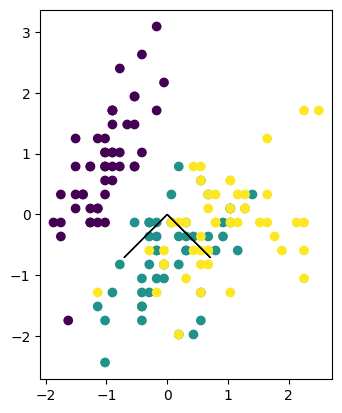

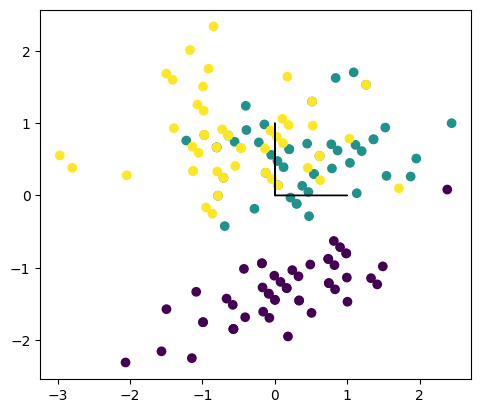

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.arrow(0, 0, eigen_vec[0, 0], eigen_vec[1, 0])
plt.arrow(0, 0, eigen_vec[0, 1], eigen_vec[1, 1])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.figure()
X_rot = X @ eigen_vec
plt.scatter(X_rot[:, 0], X_rot[:, 1], c=y)
plt.arrow(0, 0, 1, 0)
plt.arrow(0, 0, 0, 1)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

Custom implementation

In [4]:
class CustomPCA:

    def __init__(self, num_comp):
        self.num_comp = num_comp

    def fit(self, X):

        cov_matr = np.cov(X, rowvar=False)

        eigen_val, eigen_vec = np.linalg.eig(cov_matr)

        # sort to make eigenvalues in decreasing order
        ind_sort = np.argsort(eigen_val)[::-1]

        self.eigen_val = eigen_val[ind_sort]
        self.eigen_vec = eigen_vec[:, ind_sort]

        self.eigen_vec_k = self.eigen_vec[:, :self.num_comp]
        self.var_expl_vs_total = np.sum(self.eigen_val[:self.num_comp])/np.sum(self.eigen_val)

    def transform(self, X):
        
        return X @ self.eigen_vec_k


In [5]:
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean)/X_std


In [6]:
pca = CustomPCA(num_comp=4)

pca.fit(X)
X_new = pca.transform(X)

In [7]:
# Если все компоненты сохранены - после возвращения в старый базис матрицы совпадут
print(np.allclose(X, X_new @ pca.eigen_vec_k.T))

True


In [8]:
for ii in range(1, 5):

    pca = CustomPCA(num_comp=ii)

    pca.fit(X)
    print(pca.var_expl_vs_total)


0.7296244541329983
0.9581320720000164
0.9948212908928452
1.0


Scikit PCA

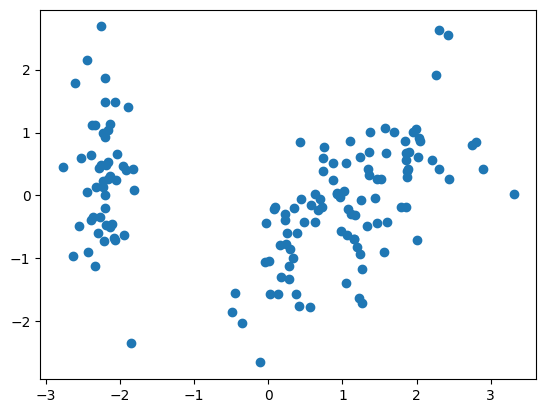

In [9]:
from sklearn.decomposition import PCA
X_new_scikit = PCA(n_components=2).fit_transform(X)

plt.scatter(X_new_scikit[:, 0], X_new_scikit[:, 1])

Сначала два признака, понизили до 1-го и обратно

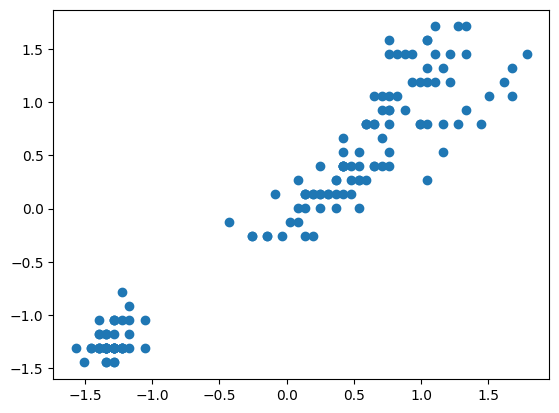

In [10]:
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean)/X_std

pca = CustomPCA(num_comp=1)
pca.fit(X)
X_new = pca.transform(X)

plt.scatter(X[:, 0], X[:, 1])

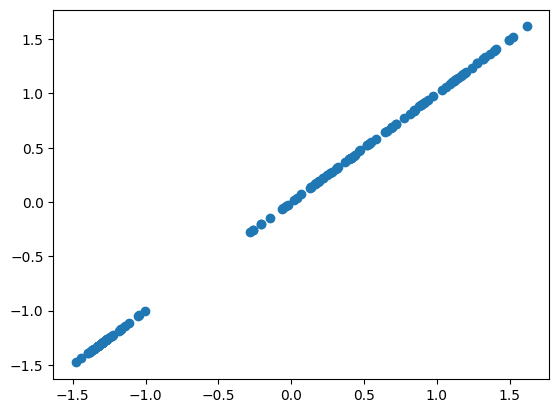

In [11]:
X_restore = np.hstack((X_new, np.zeros_like(X_new))) @ pca.eigen_vec.T

plt.scatter(X_restore[:, 0], X_restore[:, 1])